# Capítulo 6: Geomtría de las soluciones para LPs

## Qué es una solución factible...???

Satisface todas las restricciones del problema.

## Todo programa lineal se puede escribir en su forma estándar:
$$
\begin{align*}
    & \min c^Tx \\
    \text{s.r.} \\
    & A x = b \\
    & x \geq 0
\end{align*}
$$

### Qué es una solución básica...???

Si de las $n$ componentes del vector $x$, existen $m$ variables básicas y $n-m$ variables no básicas. Entonces $x$ es una solución básica del sistema.
Es decir, las $m$ columnas (correspondientes) de la matriz $A$ forman una base no singular y el cada variable no básica tiene el valor de cero.

## Qué es una variable básica...???

Es aquella variable que en la solución tiene un valor diferente de cero y su correspondiente columna forma parte de una base.


**Ejemplo: (2D)**
--
Graficar el poliedro asociado al siguiente problema lineal.
$$
\begin{align*}
    \max x + y \\
    y \geq 2 \\
    2x - y \geq 5 \\
    x+2y \leq 25 \\
    2x-4y \leq 8
\end{align*}
$$

In [130]:
import numpy as np
Vertices = []
x = np.arange(0, 20, 0.01)
y = {0:2+x*0, 
     1:2*x-5,
     2:(25-x)/2,
     3: (2*x-8)/4}
for i in range(4):
    for j in range(i+1,4):
        idx = np.argwhere(np.diff(np.sign(y[i] - y[j]))).flatten()
        if len(idx) != 0:
            x_0 = x[idx][1]
            y_0 = y[i][idx][1]
            if y_0 >=2 and 2*x_0 - y_0>= 5 and x_0+2*y_0 <= 25 and 2*x_0 - 4*y_0 <= 8:
                Vertices.append([x_0, y_0])
Vertices = np.array(Vertices)

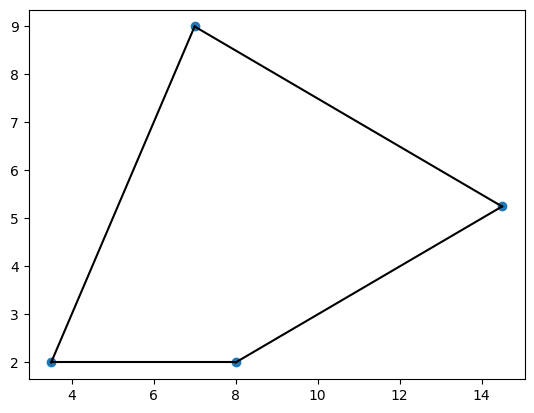

In [131]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import matplotlib.pyplot as plt

hull = ConvexHull(Vertices)

plt.plot(Vertices[:,0], Vertices[:,1], 'o')
for simplex in hull.simplices:
    plt.plot(Vertices[simplex, 0], Vertices[simplex, 1], 'k-')
plt.show()

Ejercicio:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 8x + 6y \\
    \text{s.r.} \\
    &5x + 3y \leq 30 \\
    &2x + 3y \leq 24 \\
    &x + 3y \leq 18 \\
    &x,y \geq 0
\end{align*}
$$

**Ejemplo: (3D)**
--
Graficar el poliedro asociado al siguiente problema lineal.
$$
\begin{align*}
    &\max x + y + z \\
    \text{s.r.} \\
    &x \leq 1 \\
    &y \leq 1 \\
    &z \leq 1 \\
    & x,y,z \geq 0
\end{align*}
$$

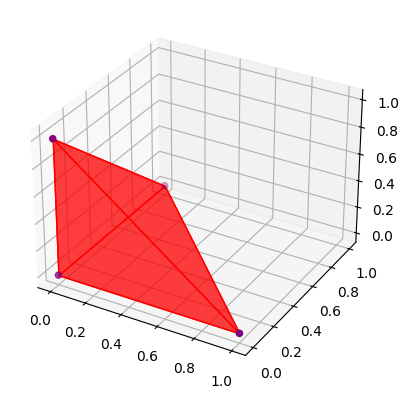

In [134]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

Vertices = np.array([[1,0,0],[0,1,0],[0,0,1], [0,0,0] ])
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
hull = ConvexHull(Vertices)
# draw the polygons of the convex hull
for s in hull.simplices:
       tri = Poly3DCollection([Vertices[s]])
       tri.set_color('r')
       tri.set_alpha(0.5)
       ax.add_collection3d(tri)
# draw the vertices
ax.scatter(Vertices[:, 0], Vertices[:, 1], Vertices[:, 2], marker='o', color='purple')
plt.show()

Deber:
--
Encontrar el poliedro asociado al siguiente programa lineal.
$$
\begin{align*}
    &\max 550x + 600 y \\
    \text{s.r.} \\
    &12 x + 20 y \leq 288 \\
    &10 x + 8y \leq 192 \\
    &20x + 20 y \leq 384
    &x,y \geq 0
\end{align*}
$$